<a id='top'></a>

# CSCI3022 F20
# Homework 7: Hypothesis Testing
***

**Name**: Jonathan Phouminh

***

This assignment is due on Canvas by **MIDNIGHT on Monday November 23**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

## Collaborators: 
    - Zach Chommala
    - Bao Nguyen 

In [24]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 1: A One-Sample Hypothesis


You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

**null:** The bus arrive at an exponential rate with $\lambda = \frac{1}{10}$. <br>
**alt:** The bus arrives later than the projected exponential rate 

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?


We need to calculate the C value that is the start of the rejection region. <br>
So, finding C for P(X > C | Null is true) = $\alpha$ <br>

We are given this a exponential distribution and also its rate. <br><br>

$ \int_{C}^{\infty} e^{\frac{-1x}{10}} \,dx = 0.05 $ <br>
$ \frac{1}{10}\int_{C}^{\infty} e^{\frac{-1x}{10}} \,dx = 0.05 $ <br>
... <br>
$\frac{1}{10} [0 + \frac{e^\frac{-c}{10}}{\frac{1}{10}}] = 0.05$ <br> <br>
$e^\frac{-c}{10} = 0.05$ <br><br>

C is approximately **13 minutes** and is the point where we reject the null hypothesis.



**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)







**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?





<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 2: Choosing your error levels

Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


This article is disussing how researchers and scientists are misrepresenting p-values and how they draw false conclusions that the media shares. A way people are misusing P values is that they are taking the litteral value and saying that it is the probability of the null hypothesis being true when it really doesn't say anything about the validity of the null hypothesis. A solution that is mentioned to make proper use of p-values is reducing the current P-Value threshold from .05 to .005 as there is less chance of incorrectness. I agree with the proposal of reducing the p-value becuase with a much stricter acceptance scientists would feel even more confident with sharing their findings among media.

---

<a id='p3'></a>
[Back to top](#top)

### [25 points] Problem 3 - Some Quick Hitters

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You're Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russell fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

In [25]:
def loadDeck(arr):
    for i in range(1,14):
        for j in range(4):
            if j == 0:
                arr.append(str(i) + "d")
            elif j == 1:
                arr.append(str(i) + "s")
            elif j == 2:
                arr.append(str(i) + "h")
            else:
                arr.append(str(i) + "c")
    return arr

In [26]:
def simulate(cards):
    np.random.shuffle(cards)
    drawCount = 0
    foundCards = 0
    while(len(cards) > 0):
        if (foundCards == 4):
            return drawCount
        draw = cards.pop()
        drawCount += 1
        if draw == '6h':
            foundCards += 1
        elif draw == "13c":
            foundCards += 1
        elif draw == "8d":
            foundCards += 1
        elif draw == "14":
            foundCards+=1
    return drawCount

In [27]:
totalCounts = []    
for i in range(250000):
    cards = []
    loadDeck(cards)
    cards.append(str(14))
    cards.append(str(14))
    totalCounts.append(simulate(cards))

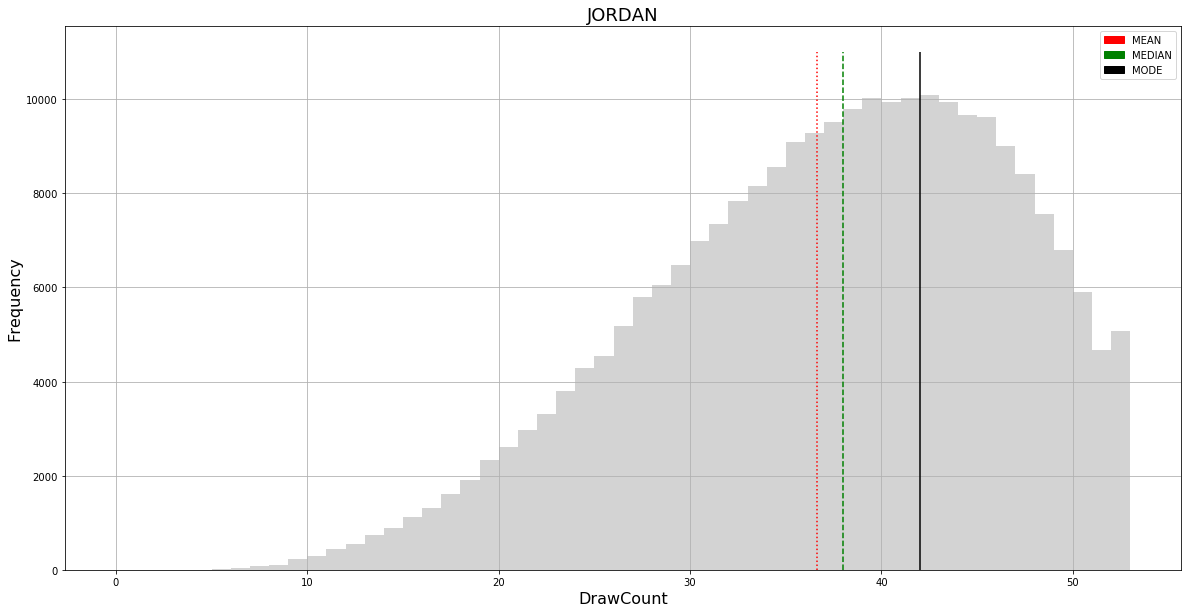

In [32]:
import matplotlib

# graphing the histograms 
def plotHistogram(finishing_times):
    mean = np.mean(finishing_times)
    median = np.median(finishing_times)
    mode = stats.mode(finishing_times)
    series = pd.Series(finishing_times)

    my_bins = range(0, 54, 1)
    fig, ax = plt.subplots(figsize=(20,10))

    # titles / legend
    plt.hist(series, bins = my_bins, color = "lightgrey")
    ax.set_title("JORDAN", fontsize = 18,)
    ax.set_ylabel("Frequency", fontsize = 16)
    ax.set_xlabel("DrawCount", fontsize = 16)
    
    
    red_patch = matplotlib.patches.Patch(color='red', label='MEAN')
    green_patch = matplotlib.patches.Patch(color='green', label='MEDIAN')
    black_patch = matplotlib.patches.Patch(color='black', label='MODE')
    plt.legend(handles=[red_patch, green_patch, black_patch])

    
    plt.vlines(median, 0, 11000, color = "green", linestyles='dashed')
    plt.vlines(mean, 0, 11000, color = "red", linestyles='dotted')
    plt.vlines(mode[0][0], 0, 11000, color = "black")
    ax.grid(alpha=1)
    
a = np.array(totalCounts) 
plotHistogram(a)

Examining the graph, it looks fairly normal with a negative skew. 

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

The 99% confidence interval. The way I would explain this would be asking them a similar question, "If there are 10 apples and 1 of them is blue. I would be more sure if I got the apple that is blue if i collected 9 apples than if i collected only 5 apples"

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by different "statistical measures". Compute a 95% confidence interval for the _mean_.


In [ ]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])

In [ ]:
def computeVariance(arr):
    constant = 1/(len(arr)-1)
    summation = 0
    summation2 = 0
    for i in arr:
        summation += math.pow(i,2)
        summation2 += i
        
    summation2 = math.pow(summation2, 2)
    summation2 = summation2 * 1/(len(arr))
    
    ans = constant*(summation-summation2)
    return ans

In [ ]:
variance = computeVariance(smith)
mean = smith.mean()
z = 1.96  # Z-score table 
CI_lower = mean - z*(math.sqrt(variance)/(math.sqrt(len(smith))))
CI_upper = mean + z*(math.sqrt(variance)/(math.sqrt(len(smith))))

print("Lower CI: ", CI_lower)
print("Upper CI:", CI_upper)


***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


We would want a lower type 2 error because we want minimize the possibility that we don't reject the strengh of the carbon as opposed to falsey rejecting the perfectly fine carbon strength


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

In [10]:
# first set of measurements
sample_one = 49
mean1 = 47.2
sd1 = 29.2

# second set of measurements
sample_two = 65
mean2 = 63.9
sd2 = 19.6

z = 1.96 # the z score based based off of our significance level

**H0:** Population Mean of baby dumbo octo sucker - baby reef octo sucker is <= 7 <br> 
**H1:** Population Mean of baby dumbo octo sucker - baby reef octo sucker is > 7 <br><br>

To decide if there is enough evidence we can compute the Z statistic and compare it with the z_alpha value and make a conclusion based on the its relationship. (choosing to use z since standard deviation is known)

In [21]:
def computeZ(pop1, pop2, pop1mean, pop2mean, var1, var2, mu):
    # numerator 
    popMeanDiff = pop2mean - pop1mean
    num = popMeanDiff - mu
    
    # denominator
    one = math.pow(var1,2) / pop1
    two = math.pow(var2,2) / pop2
    denom = math.sqrt(one + two)
    
    return num / denom

In [22]:
Zstat = computeZ(sample_one, sample_two, mean1, mean2, sd1, sd2, 7)
print(tstat)

2.009053768311491


Based on how we defined the rejection region given the alternative hypothesis. Since **Zstat > Z.0025** we can conclude that the difference between the two octopus suckers is greater than 7!

---

<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4 - Maybe we actually do some tests now?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [34]:
def computeCI(mean , sd, alpha, sampleSize):
    degreeFreedom = sampleSize - 1
    upper = mean + stats.t.ppf(alpha, degreeFreedom)*(sd/math.sqrt(sampleSize))
    lower = mean - stats.t.ppf(alpha, degreeFreedom)*(sd/math.sqrt(sampleSize))
    print("lower: ", lower)
    print("upper: ", upper)

In [37]:
print("Group 1 tCI")
computeCI(451.3, 31.9, .9875, 15)
print("-------")
print("Group 2 tCI")
computeCI(494.2, 39.6, .9875, 15)
print("-------")
print("Group 3 tCI")
computeCI(492.8, 45.2, .9875, 15)
print("-------")

Group 1 tCI
lower:  430.629819658
upper:  471.970180342
-------
Group 2 tCI
lower:  468.540465783
upper:  519.859534217
-------
Group 3 tCI
lower:  463.511844782
upper:  522.088155218
-------


We use t distribution because our sample size was small (n < 30). Based on the intervals I would conclude that Coffee+nap incurs the fastest reaction time!

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

let H0: Drinking coffee or taking a nap result in the the same reaction time <br>
let H1: Drinking coffee results in slower reaction time compared to napping <br>

In [45]:
def computeT(pop1, pop2, pop1mean, pop2mean, var1, var2, mu):
    # numerator 
    popMeanDiff = pop2mean - pop1mean
    num = popMeanDiff - mu
    
    # denominator
    one = math.pow(var1,2) / pop1
    two = math.pow(var2,2) / pop2
    denom = math.sqrt(one + two)
    
    return num / denom

In [51]:
# coffee vs nap
Tstat = computeT(15, 15, 492.8, 494.2, 45.2, 39.6, 0)
print("T: ", stats.t.ppf((1-(0.025/2)),14))
print("TStat: ",Tstat)

T:  2.50956941148
TStat:  0.0980091969611576


Based on these results I would say that the null hypothesis is true

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

For the following problems I will conduct the same T test as above

let H0: Drinking coffee or taking a nap and drinking coffee result in the the same reaction time <br>
let H1: Drinking coffee results in slower reaction time compared to drinking coffee and napping <br>

In [52]:
# coffee-nap versus coffee
Tstat = computeT(15, 15, 451.3,494.2, 31.9, 31.9, 0)
print("T: ", stats.t.ppf((1-(0.025/2)),14))
print("TStat: ",Tstat)

T:  2.50956941148
TStat:  3.2674426640629344


Since, Tstat is is greater than T, we reject the null hypothesis

let H0: Drinking coffee and napping or taking a nap result in the the same reaction time <br>
let H1: Drinking coffee and napping results in faster reaction time than just napping <br>

In [57]:
# coffee-nap versus nap
Tstat2 = computeT(15, 15, 451.3, 492.8, 45.2, 39.6, 0)
print("T: ", stats.t.ppf((1-(0.025/2)),14))
print("TStat: ",Tstat2)

T:  2.50956941148
TStat:  2.6746561358951073


Again, since Tstat is greater than T here, we will reject the null hypothesis 

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

In [70]:
size = 15
mean = 451.3
sd = 31.9
lowerChi = 5.629
upperChi = 26.119


lowerbound = math.sqrt(((size-1)*(math.pow(sd,2)))/(upperChi))
upperbound = math.sqrt(((size-1)*(math.pow(sd,2)))/(lowerChi))
print("lowerbound: ", lowerbound)
print("upperbound: ", upperbound)

lowerbound:  23.354814824224
upperbound:  50.30823449481638


Chi table probabilites: https://people.richland.edu/james/lecture/m170/tbl-chi.html